In [10]:
import pandas as pd

# Load the existing dataset file
df = pd.read_csv('Dataset .csv')

# Preview first few rows
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [11]:
# Replace missing values where needed
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df['Locality'] = df['Locality'].fillna('Unknown')
df['Price range'] = df['Price range'].fillna(df['Price range'].median())

# Check if there are still missing values
print(df.isnull().sum())


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [12]:
def recommend_restaurants(cuisine_pref, locality_pref, price_range_pref, df=df, top_n=5):
    # filter restaurants based on preferences
    filtered = df[
        (df['Cuisines'].str.contains(cuisine_pref, case=False, na=False)) &
        (df['Locality'].str.contains(locality_pref, case=False, na=False)) &
        (df['Price range'] == price_range_pref)
    ]
    
    # sort by rating, select columns
    recommended = filtered[['Restaurant Name', 'Aggregate rating', 'Average Cost for two', 'Cuisines', 'Locality']].sort_values(by='Aggregate rating', ascending=False)
    return recommended.head(top_n)


In [13]:
recommend_restaurants('Chinese', 'Koramangala', 2)

,Restaurant Name,Aggregate rating,Average Cost for two,Cuisines,Locality
734,ECHOES Koramangala,4.7,950,"Continental, American, Italian, North Indian, ...",Koramangala 5th Block


In [16]:
    #" another option like user input " 
cuisine_input = input("Preferred cuisine (e.g. Chinese): ")
locality_input = input("Preferred locality (e.g. Koramangala): ")
price_range_input = int(input("Preferred price range (1/2/3): "))

results = recommend_restaurants(cuisine_input, locality_input, price_range_input)
print(results)





Preferred cuisine (e.g. Chinese):  chinese
Preferred locality (e.g. Koramangala):  koramangala
Preferred price range (1/2/3):  2


        Restaurant Name  Aggregate rating  Average Cost for two  \
734  ECHOES Koramangala               4.7                   950   

                                              Cuisines               Locality  
734  Continental, American, Italian, North Indian, ...  Koramangala 5th Block  


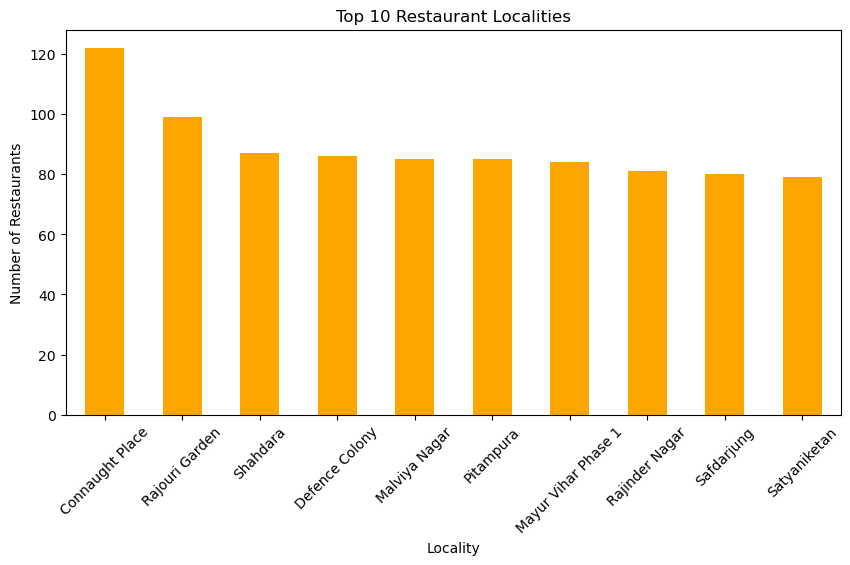

In [18]:
# Count unique restaurants by locality
locality_counts = df['Locality'].value_counts().head(10)

# Plot top 10 localities
plt.figure(figsize=(10,5))
locality_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Restaurant Localities')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


Saved sample recommendations to results/sample_recommendations.csv
Saved cuisine bar chart to results/plots/top10_cuisines.png
Saved rating histogram to results/plots/rating_distribution.png


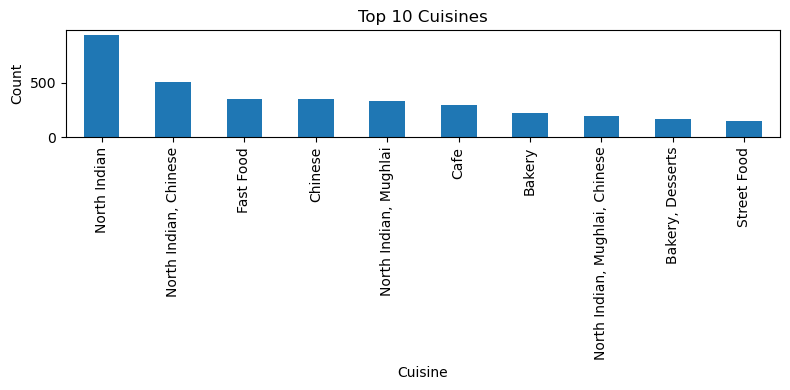

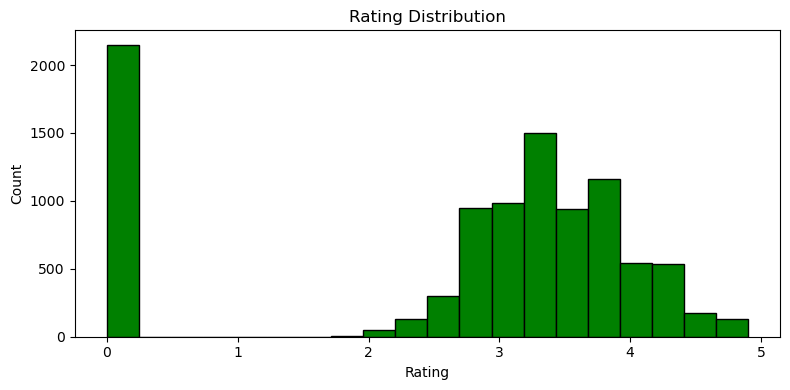

In [20]:
# Cell: Save results and visuals for Task 2

import os

# Create output directories
os.makedirs('results', exist_ok=True)
os.makedirs('results/plots', exist_ok=True)

# 1. Save a sample recommendation result to CSV
# (Here we use a test preference; replace with any inputs you like)
sample_recs = recommend_restaurants('Chinese', 'Koramangala', 2)
sample_recs.to_csv('results/sample_recommendations.csv', index=False)
print("Saved sample recommendations to results/sample_recommendations.csv")

# 2. Save your visualization figures
import matplotlib.pyplot as plt

# Example: save cuisine distribution plot
fig, ax = plt.subplots(figsize=(8,4))
df['Cuisines'].value_counts().head(10).plot(kind='bar', ax=ax)
ax.set_title('Top 10 Cuisines')
ax.set_xlabel('Cuisine')
ax.set_ylabel('Count')
plt.tight_layout()
fig.savefig('results/plots/top10_cuisines.png')
print("Saved cuisine bar chart to results/plots/top10_cuisines.png")

# Example: save rating distribution histogram
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Aggregate rating'], bins=20, color='green', edgecolor='black')
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.tight_layout()
fig.savefig('results/plots/rating_distribution.png')
print("Saved rating histogram to results/plots/rating_distribution.png")
